# Lana Culp - 11.20.2024 - Spotify Analysis Report 
#### Albums Chosen
1. Arcane League of Legends (Soundtrack from the Animated Series) 
3. Arcane League of Legends: Season 2 (from the series Arcane League of Legends)

#### The Meaning
These albums comes from one of my favorite animated series on Netflix that has the most beautiful artwork and moving songs. Recently, Season 2 has been coming out in parts, and it is so good. I absolutely love the series, so I thought it would be fitting for me to use the soundtracks from both seasons since they are fresh in my mind and very emotionally driven.

In [303]:
import urllib
import requests
import pandas as pd 
import json
import base64
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import numpy as np

In [172]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).\
                                  encode("ascii"))
    header = {'Authorization':'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, 
                            data = data, 
                            headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [173]:
keys = pd.read_csv("text_files_SpotifyAPI.txt")

In [174]:
#keys

In [175]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


In [176]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

In [177]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [178]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

## Artist Albums
Below I am taking the album ID of the 2 albums I will be exploring.

In [179]:
s1_album_id = '0jV32pIk8l3vTaU3thTaW2'
s2_album_id = '6Db8Sq5w6Brg7lkpg7Y9ls'

In [180]:
s1_album_response = api_call(ab_tracks_ep.format(s1_album_id), session_header)
s2_album_response = api_call(ab_tracks_ep.format(s2_album_id), session_header)

200
200


In [181]:
s1_album_df = pd.DataFrame(s1_album_response['items'])
s2_album_df = pd.DataFrame(s2_album_response['items'])

## Artist Tracks & Track Features
Below I am taking the tracks from each album.

In [182]:
s1_track_ids = ','.join(s1_album_df['id'].to_list())
s2_track_ids = ','.join(s2_album_df['id'].to_list())

In [183]:
t_features_ep + '?ids={}'.format(s1_track_ids)

'https://api.spotify.com/v1/audio-features?ids=5cRDr86y5LGJSzWyiEE21M,6Mf9UqNMc22JktEOUn25ad,3gXqz0S2KmgNIAVjqbZ1e2,7yUMsB2mjbhcWl3VZfnnqo,72GsidlGNq4DVig0RYzZ3q,1yBoI01Y9dpPwqk9qBi44d,14HLJK4Vm5Bw2y1zDvTDEj,0aJNOA7ycPQJKADfmGqzz7,1byMfvmJMRzNBz458rrYE4,55J8LABswOlznJHhYvYQNE,6YB9jhzVEzw8CKeXD7Vx8j'

In [184]:
s1_track_features = api_call(t_features_ep + '?ids={}'.format(s1_track_ids), 
                             session_header)
s2_track_features = api_call(t_features_ep + '?ids={}'.format(s2_track_ids), 
                             session_header)

200
200


In [185]:
s1_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(s1_track_ids), 
                             session_header)
s2_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(s2_track_ids), 
                             session_header)

200
200


In [186]:
s1_features_df = pd.DataFrame(s1_track_features['audio_features'])
s2_features_df = pd.DataFrame(s2_track_features['audio_features'])

#s1_features_df.head()

In [187]:
s1_tracks_df = pd.DataFrame(s1_track_info['tracks'])
s2_tracks_df = pd.DataFrame(s2_track_info['tracks'])

#s1_tracks_df.head()

## Album Merged Data 
Below I am merging the data from both the albums' features and tracks. I am the sorting the information from most popular to least popular using the "popularity" key displaying only the head of the data.

In [188]:
s1_merged = pd.merge(s1_features_df, s1_tracks_df, 
         how = 'inner', on = 'id').\
sort_values('popularity', ascending = False).head()
s1_merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
10,0.440,0.288,5,-8.897,0,0.0386,0.576000,0.001280,0.0802,0.1760,...,{'spotify': 'https://open.spotify.com/track/6Y...,https://api.spotify.com/v1/tracks/6YB9jhzVEzw8...,False,True,What Could Have Been (from the series Arcane L...,65,https://p.scdn.co/mp3-preview/f8484f2a83175bf4...,11,track,spotify:track:6YB9jhzVEzw8CKeXD7Vx8j
7,0.704,0.835,1,-5.167,1,0.0552,0.013700,0.000000,0.0982,0.8920,...,{'spotify': 'https://open.spotify.com/track/0a...,https://api.spotify.com/v1/tracks/0aJNOA7ycPQJ...,False,True,Dynasties and Dystopia (from the series Arcane...,60,https://p.scdn.co/mp3-preview/0e1ec79227291e28...,8,track,spotify:track:0aJNOA7ycPQJKADfmGqzz7
0,0.515,0.704,8,-6.834,1,0.0294,0.010000,0.000062,0.1290,0.3500,...,{'spotify': 'https://open.spotify.com/track/5c...,https://api.spotify.com/v1/tracks/5cRDr86y5LGJ...,False,True,Playground (from the series Arcane League of L...,59,https://p.scdn.co/mp3-preview/791f3b06ef3c201c...,1,track,spotify:track:5cRDr86y5LGJSzWyiEE21M
8,0.423,0.842,1,-6.240,0,0.2360,0.000396,0.000907,0.3780,0.3420,...,{'spotify': 'https://open.spotify.com/track/1b...,https://api.spotify.com/v1/tracks/1byMfvmJMRzN...,False,True,Snakes (from the series Arcane League of Legends),57,https://p.scdn.co/mp3-preview/1e84827c997f54d8...,9,track,spotify:track:1byMfvmJMRzNBz458rrYE4
2,0.365,0.318,10,-11.775,0,0.0360,0.663000,0.000622,0.1010,0.0489,...,{'spotify': 'https://open.spotify.com/track/3g...,https://api.spotify.com/v1/tracks/3gXqz0S2KmgN...,False,True,Goodbye (from the series Arcane League of Lege...,56,https://p.scdn.co/mp3-preview/ec05daa7fa309009...,3,track,spotify:track:3gXqz0S2KmgNIAVjqbZ1e2


In [189]:
s2_merged = pd.merge(s2_features_df, s2_tracks_df, 
         how = 'inner', on = 'id').\
sort_values('popularity', ascending = False).head()
s2_merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
5,0.475,0.701,6,-7.050,1,0.0463,0.008280,0.037600,0.127,0.2900,...,{'spotify': 'https://open.spotify.com/track/7f...,https://api.spotify.com/v1/tracks/7fotwkvGTsn0...,False,True,To Ashes and Blood (from the series Arcane Lea...,71,https://p.scdn.co/mp3-preview/ab36e7159aa8d6c2...,6,track,spotify:track:7fotwkvGTsn0N6KSia3TGW
3,0.628,0.902,2,-4.906,1,0.1740,0.003780,0.010500,0.409,0.7180,...,{'spotify': 'https://open.spotify.com/track/3E...,https://api.spotify.com/v1/tracks/3EV36iJa1lmF...,False,True,Renegade (We Never Run) (from the series Arcan...,69,https://p.scdn.co/mp3-preview/842b142381f2a53e...,4,track,spotify:track:3EV36iJa1lmFNutg3H7sUL
0,0.458,0.589,0,-8.305,1,0.0271,0.006410,0.000576,0.140,0.0554,...,{'spotify': 'https://open.spotify.com/track/5Y...,https://api.spotify.com/v1/tracks/5YlMdOkIHnEG...,False,True,Heavy Is The Crown (Original Score) (from the ...,68,https://p.scdn.co/mp3-preview/73ce637e23856241...,1,track,spotify:track:5YlMdOkIHnEGa7m2Ezh5uS
2,0.479,0.751,8,-5.794,0,0.0580,0.019200,0.000019,0.111,0.5680,...,{'spotify': 'https://open.spotify.com/track/7d...,https://api.spotify.com/v1/tracks/7dsO7sKTEdix...,False,True,Sucker (from the series Arcane League of Legends),68,https://p.scdn.co/mp3-preview/78d2538562c38098...,3,track,spotify:track:7dsO7sKTEdix1pe1t7SmP0
4,0.607,0.862,9,-5.223,1,0.1200,0.000587,0.000000,0.461,0.2840,...,{'spotify': 'https://open.spotify.com/track/3I...,https://api.spotify.com/v1/tracks/3INAjmbsynUS...,False,True,Hellfire (from the series Arcane League of Leg...,68,https://p.scdn.co/mp3-preview/5273559112b09972...,5,track,spotify:track:3INAjmbsynUSIBUoqxrytc


## Album Compare
Below I am adding the season from which the song is from to the dataframes and merging all the album data to compare.

In [190]:
s1_merged['album'] = "Arcane Season 1"
s2_merged['album'] = "Arcane Season 2"
s1_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y'],
      dtype='object')

In [191]:
album_compare = pd.concat([s1_merged.head(), s2_merged.head()], axis = 0).\
sort_values('popularity', ascending = False)
album_compare.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
5,0.475,0.701,6,-7.050,1,0.0463,0.008280,0.037600,0.127,0.2900,...,{'spotify': 'https://open.spotify.com/track/7f...,https://api.spotify.com/v1/tracks/7fotwkvGTsn0...,False,True,To Ashes and Blood (from the series Arcane Lea...,71,https://p.scdn.co/mp3-preview/ab36e7159aa8d6c2...,6,track,spotify:track:7fotwkvGTsn0N6KSia3TGW
3,0.628,0.902,2,-4.906,1,0.1740,0.003780,0.010500,0.409,0.7180,...,{'spotify': 'https://open.spotify.com/track/3E...,https://api.spotify.com/v1/tracks/3EV36iJa1lmF...,False,True,Renegade (We Never Run) (from the series Arcan...,69,https://p.scdn.co/mp3-preview/842b142381f2a53e...,4,track,spotify:track:3EV36iJa1lmFNutg3H7sUL
0,0.458,0.589,0,-8.305,1,0.0271,0.006410,0.000576,0.140,0.0554,...,{'spotify': 'https://open.spotify.com/track/5Y...,https://api.spotify.com/v1/tracks/5YlMdOkIHnEG...,False,True,Heavy Is The Crown (Original Score) (from the ...,68,https://p.scdn.co/mp3-preview/73ce637e23856241...,1,track,spotify:track:5YlMdOkIHnEGa7m2Ezh5uS
2,0.479,0.751,8,-5.794,0,0.0580,0.019200,0.000019,0.111,0.5680,...,{'spotify': 'https://open.spotify.com/track/7d...,https://api.spotify.com/v1/tracks/7dsO7sKTEdix...,False,True,Sucker (from the series Arcane League of Legends),68,https://p.scdn.co/mp3-preview/78d2538562c38098...,3,track,spotify:track:7dsO7sKTEdix1pe1t7SmP0
4,0.607,0.862,9,-5.223,1,0.1200,0.000587,0.000000,0.461,0.2840,...,{'spotify': 'https://open.spotify.com/track/3I...,https://api.spotify.com/v1/tracks/3INAjmbsynUS...,False,True,Hellfire (from the series Arcane League of Leg...,68,https://p.scdn.co/mp3-preview/5273559112b09972...,5,track,spotify:track:3INAjmbsynUSIBUoqxrytc


## Audio Features
I chose to dissect energy and loudness out of all of the audio features. Below I plotted all of the various audio features and then compared which two had the most common histogram dataset. I chose energy and loudness because I feel like they go hand in hand with one another, and the data seems to prove that as well.

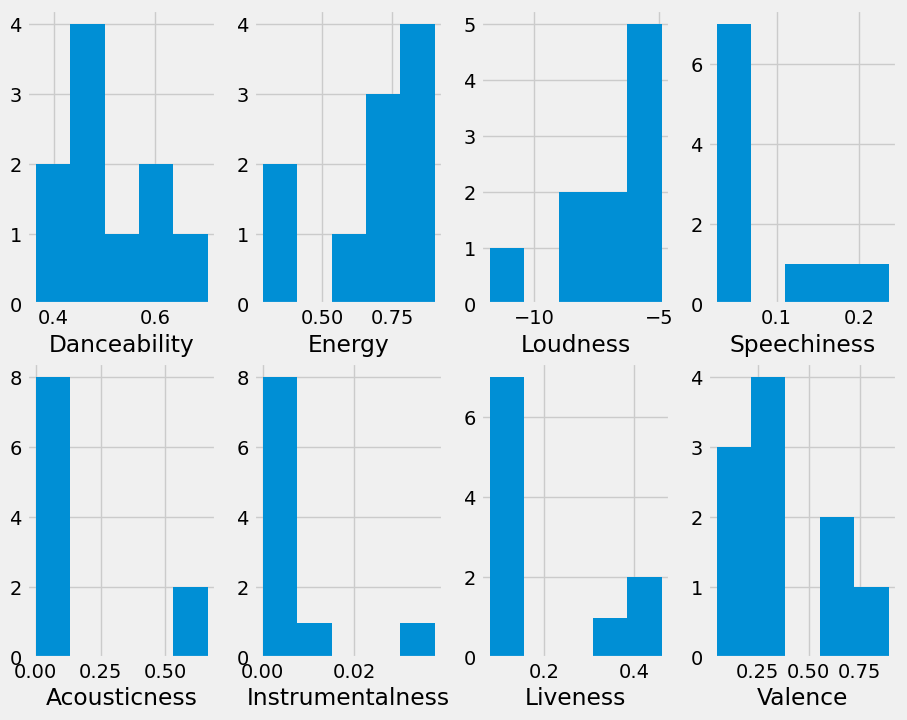

In [266]:
fig1, ax1 = plt.subplots(2, 4, figsize = (10, 8))
ax1[0, 0].hist(album_compare['danceability'], bins=5)
ax1[0, 1].hist(album_compare['energy'], bins=5)
ax1[0, 2].hist(album_compare['loudness'], bins=5)
ax1[0, 3].hist(album_compare['speechiness'], bins=5)
ax1[1, 0].hist(album_compare['acousticness'], bins=5)
ax1[1, 1].hist(album_compare['instrumentalness'], bins=5)
ax1[1, 2].hist(album_compare['liveness'], bins=5)
ax1[1, 3].hist(album_compare['valence'], bins=5)
ax1[0, 0].set_xlabel('Danceability')
ax1[0, 1].set_xlabel('Energy')
ax1[0, 2].set_xlabel('Loudness')
ax1[0, 3].set_xlabel('Speechiness')
ax1[1, 0].set_xlabel('Acousticness')
ax1[1, 1].set_xlabel('Instrumentalness')
ax1[1, 2].set_xlabel('Liveness')
ax1[1, 3].set_xlabel('Valence')

plt.show()

## Energy & Loudness
Below I am comparing the Energy and Loudness levels within the songs from the Arcane soundtracks. I can see that energy and loudness have similar increasing slopes. I then took the energy by loudness for both seasons and compared them on a scatter plot with the pink dots representing season 1, and the blue dots representing season 2 since those are the colors of the two main characters from the show. 

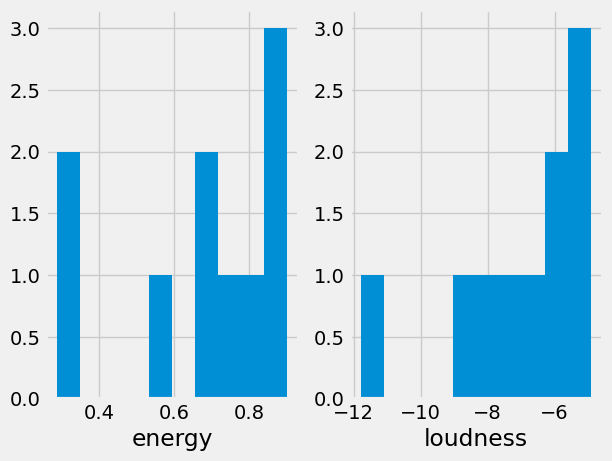

In [280]:
fig2, ax2 = plt.subplots(1, 2)
ax2[0].hist(album_compare['energy'])
ax2[1].hist(album_compare['loudness'])
ax2[0].set_xlabel('energy')
ax2[1].set_xlabel('loudness')

plt.show()

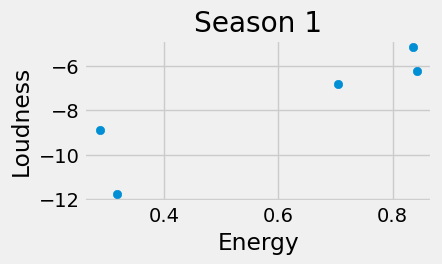

In [281]:
fig3, ax3 = plt.subplots(figsize = (4, 2))
ax3.scatter(s1_merged['energy'], s1_merged['loudness'])
ax3.set_xlabel('Energy')
ax3.set_ylabel('Loudness')
ax3.set_title('Season 1')

plt.show()

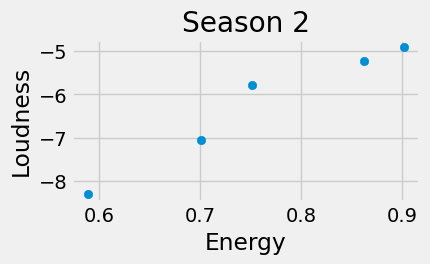

In [282]:
fig4, ax4 = plt.subplots(figsize = (4, 2))
ax4.scatter(s2_merged['energy'], s2_merged['loudness'])
ax4.set_xlabel('Energy')
ax4.set_ylabel('Loudness')
ax4.set_title('Season 2')

plt.show()

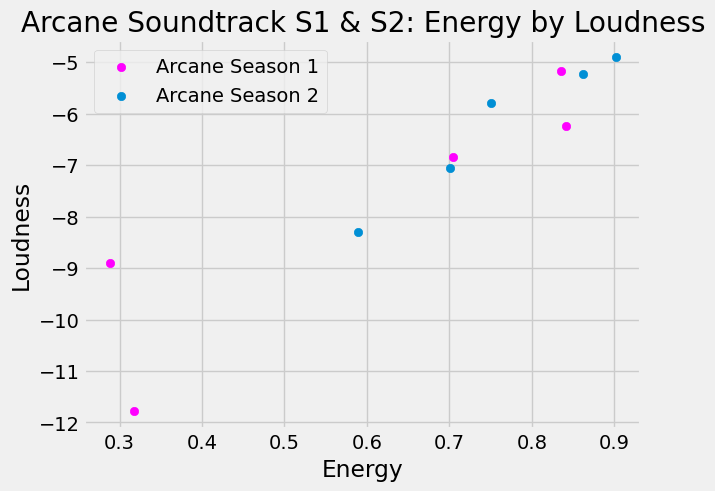

In [352]:
fig5, ax5 = plt.subplots()
ax5.scatter(s1_merged['energy'], s1_merged['loudness'], color = 'magenta')
ax5.set_xlabel('Energy')
ax5.scatter(s2_merged['energy'], s2_merged['loudness'])
ax5.set_ylabel('Loudness')
ax5.set_title('Arcane Soundtrack S1 & S2: Energy by Loudness')
ax5.legend(['Arcane Season 1', 'Arcane Season 2'])

plt.style.use('fivethirtyeight')
plt.show()

## Danceability
Comparing the 'danceability' audio feature between the Arcane Season 1 Soundtrack and Arcane Season 2 Soundtrack. Season 1 is represented by the boxplot on the left side with the pink dots. There it is clear that season 1 had less danceability in it in comparison to season 2. However, we can see from the scatter plot overlaying the boxplots that there is an outlier in season 1 that topped all of season 2. Season 2 is represented on the right with the blue dots, and overall, it had more danceability in comparison to season 2. 

In [333]:
#fig6, ax6 = plt.subplots()
#ax6.boxplot([s1_merged['danceability'], s2_merged['danceability']])
#ax6.set_title('Danceability')

#plt.show()

In [335]:
#fig7, ax7 = plt.subplots()
#ax7.scatter(s1_merged['danceability'], s2_merged['danceability'])
#ax7.set_xlabel('Season 1')
#ax7.set_ylabel('Season 2')
#ax7.set_title('Danceability')

#plt.show()

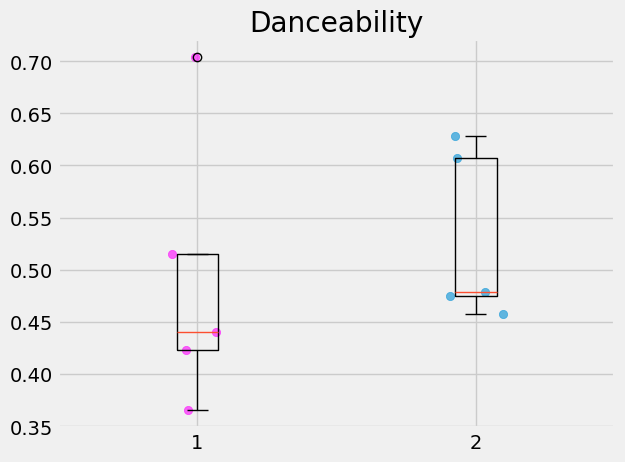

In [336]:
s1_xs = [1] * len(s1_merged)
s2_xs = [2] * len(s2_merged)
s1_x_jitter = np.random.uniform(-0.10, .10, len(s1_xs))
s2_x_jitter = np.random.uniform(-.10, .10, len(s2_xs))

fig8, ax8 = plt.subplots()
ax8.boxplot(s1_merged['danceability'], positions = [1])
ax8.boxplot(s2_merged['danceability'], positions = [2])
ax8.scatter(s1_xs + s1_x_jitter, s1_merged['danceability'], color = 'magenta', alpha = .6)
ax8.scatter(s2_xs + s2_x_jitter, s2_merged['danceability'], alpha = .6)
ax8.set_title('Danceability')

plt.show()

## Statistics
Finding the statistical differences of the 'danceability' audio feature for both Arcane Season 1 and Season 2. I decided to test danceability with valence to see if valence had any effect on the danceability from either album. It appeared from the data that valence had more of an effect season 1 than it did in season 2. Season 1 had a valence difference of 0.3934 which is greater than the valence difference of 0.1634 from season 2. However, the difference is not that much, and therefore, I do not think valence has much of an effect on the danceability of the songs. 

In [345]:
fit1 = smf.ols('danceability ~ valence', data = s1_merged).fit()

In [346]:
fit1.summary()

/opt/anaconda3/envs/ematdata/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     38.85
Date:                Wed, 20 Nov 2024   Prob (F-statistic):            0.00833
Time:                        13:49:40   Log-Likelihood:                 10.200
No. Observations:                   5   AIC:                            -16.40
Df Residuals:                       3   BIC:                            -17.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3471      0.029     11.895      0.001       0.254       0.440
valence        0.3934      0.063      6.233      0.008       0.193       0.594
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.440
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.909
Skew:                          -1.029   Prob(JB):                        0.635
Kurtosis:                       2.645   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Season 1 Formula
'danceability' = 0.3 + (0.3934 * 'valence') + E

In [349]:
fit2 = smf.ols('danceability ~ valence', data = s2_merged).fit()

In [350]:
fit2.summary()

/opt/anaconda3/envs/ematdata/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.143
Date:                Wed, 20 Nov 2024   Prob (F-statistic):              0.363
Time:                        13:55:34   Log-Likelihood:                 6.8273
No. Observations:                   5   AIC:                            -9.655
Df Residuals:                       3   BIC:                            -10.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4668      0.069      6.810      0.006       0.249       0.685
valence        0.1634      0.153      1.069      0.363      -0.323       0.650
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.363
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.398
Skew:                           0.271   Prob(JB):                        0.819
Kurtosis:                       1.728   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Season 2 Formula
'danceability' = 0.4 + (0.1634 * 'valence') + E

## Conclusion
Overall, both albums from Arcane show high points of energy and loudness. However, based off of the statistics, all other audio features are pretty low. Season 2 seems to be more popular than season 1, though. Season 2 also seems to have more danceability overall than season 1. Valence does not seem to play a strong factor in the danceability, though. 